# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [102]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [103]:
df = pd.read_csv('craftcans.csv')
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.30%,35
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.00%,35
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85


## How many rows do you have in the data? What are the column types?

In [104]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 2416
Number of columns: 7


In [105]:
columns = df.dtypes
columns

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [106]:
df.head(10)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.70%,25
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42


## What is the most common ABV? (alcohol by volume)

In [107]:
abv_counts = df['ABV'].value_counts()
most_common_abv = abv_counts.idxmax()
most_common_abv




'5.00%'

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [108]:
df['ABV']

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [109]:
df['ABV'] = df['ABV'].str.replace('%', '')
df['ABV']

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [110]:
df['ABV'] = df['ABV'].astype(float)
df['ABV']

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

In [111]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [112]:
mean_abv = df['ABV'].mean()
mean_abv

5.977342419080068

In [113]:
median_abv = df['ABV'].median()
median_abv

5.6

<Axes: ylabel='Frequency'>

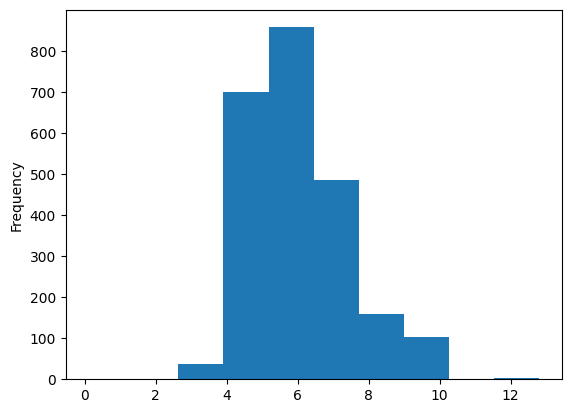

In [114]:
df['ABV'].plot(kind='hist')



### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [115]:
missing_abv_count = df['ABV'].isnull().sum()
missing_abv_count

68

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [116]:
canned_beers = df[df['Style'] == 'canned craft']
city_counts = canned_beers['Location'].value_counts()
top_10_cities = city_counts.head(10)
top_10_cities
# why this one doesn't give me the names? Because we don't have this kind of style?

Series([], Name: count, dtype: int64)

In [117]:
df.Style.unique()

array(['American IPA', 'Milk / Sweet Stout', 'English Brown Ale',
       'Pumpkin Ale', 'American Porter',
       'Extra Special / Strong Bitter (ESB)',
       'American Double / Imperial IPA', 'English Barleywine',
       'American Pale Ale (APA)', 'German Pilsener', 'Belgian Pale Ale',
       'American Pilsner', 'Saison / Farmhouse Ale', 'American Wild Ale',
       'Keller Bier / Zwickel Bier', 'American Pale Lager',
       'American India Pale Lager', 'Wheat Ale', 'Cream Ale', 'Kölsch',
       'American Pale Wheat Ale', 'American Amber / Red Ale',
       'American Double / Imperial Stout', 'American Brown Ale',
       'Old Ale', 'Tripel', 'Russian Imperial Stout', 'American Stout',
       'American Blonde Ale', 'American Black Ale',
       'Scotch Ale / Wee Heavy', 'Doppelbock', 'Fruit / Vegetable Beer',
       'Rye Beer', 'Oatmeal Stout', 'California Common / Steam Beer',
       'Altbier', 'Dubbel', 'American Strong Ale', 'Kristalweizen',
       'Czech Pilsener', 'American Amber / 

## List all of the beer from Brooklyn, NY

In [118]:
beer_from_Brooklyn = df[df['Location'] == 'Brooklyn, NY']
beer_from_Brooklyn

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most different cans of beer?

In [119]:
Brooklyn_brewery_counts = beer_from_Brooklyn.groupby('Brewery')['Beer'].nunique()
most_different_brewery = Brooklyn_brewery_counts.idxmax()
most_different_brewery

'Sixpoint Craft Ales'

## What are the five most common styles of beer produced by Sixpoint?

In [120]:
sixpoint = df[df['Brewery'] == 'Sixpoint']
sixpoint_style_counts = sixpoint['Style'].value_counts()
top_five_styles = sixpoint_style_counts.head(5)
top_five_styles

Series([], Name: count, dtype: int64)

In [121]:
# why this gives me an empty list? I found sixpoint cannot be found
sixpoint

,Beer,Brewery,Location,Style,Size,ABV,IBUs


## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [122]:
df['match_NY'] = df['Location'].str.extract(r',\s*(NY)')
matched_rows = df[df['match_NY'].notnull()]
brewery_names = matched_rows['Brewery'].unique()
brewery_names

array(['Sixpoint Craft Ales', 'Evil Twin Brewing', 'Chatham Brewing',
       'Newburgh Brewing Company', 'Southampton Publick House',
       'Montauk Brewing Company', 'Matt Brewing Company',
       'The Bronx Brewery', 'KelSo Beer Company', 'Brooklyn Brewery',
       'The Manhattan Brewing Company', 'Blue Point Brewing Company',
       'Bomb Beer Company', 'Dundee Brewing Company',
       'Upstate Brewing Company', 'Butternuts Beer and Ale'], dtype=object)

### Now *count* all of the breweries in New York state

In [123]:
df['state'] = df['Location'].str.extract(r',\s*([A-Za-z\s]+)$')
nys_breweries_count = df[df['state'] == 'NY'].shape[0]
nys_breweries_count

74

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [124]:
ipa_beers = df[df['Style'] == 'IPA']
ipa_beers
# why still an empty return?

,Beer,Brewery,Location,Style,Size,ABV,IBUs,match_NY,state


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [125]:
average_ibu = df['IBUs'].mean()
average_ibu

TypeError: can only concatenate str (not "int") to str

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [126]:
df = pd.read_csv('craftcans.csv', na_values=[0, "UNKNOWN", "UNKN"])
average_ibu = df['IBUs'].mean()
average_ibu

TypeError: can only concatenate str (not "int") to str

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

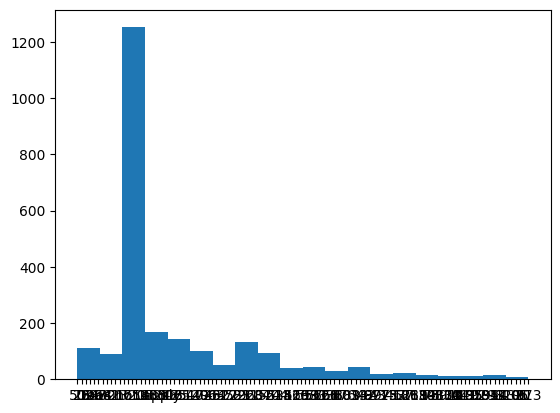

In [127]:
import matplotlib.pyplot as plt
ibu_values = df['IBUs'].dropna()
plt.hist(ibu_values, bins=20)
plt.show()

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [94]:
ibu_75th_percentile = ibu_values.quantile(0.75)
high_ibu_beers = df[df['IBU'] > ibu_75th_percentile]
high_ibu_beers

TypeError: unsupported operand type(s) for -: 'str' and 'str'

## List all of the beers with IBUs below the 25th percentile

In [93]:
ibu_25th_percentile = ibu_values.quantile(0.25)
low_ibu_beers = df[df['IBU'] < ibu_25th_percentile]
low_ibu_beers

TypeError: unsupported operand type(s) for -: 'str' and 'str'

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [98]:
median_ibus = df.groupby('Style')['IBUs'].median()
median_ibus_sorted = median_ibus.sort_values(ascending=False, na_position='last')

TypeError: agg function failed [how->median,dtype->object]

In [99]:
median_ibus_sorted.plot(kind='bar')
# very confused on na_values...I think it is the reason why I got all these error messages here...

NameError: name 'median_ibus_sorted' is not defined

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

## Draw a histogram of the IBUs of those beers

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!